<a href="https://colab.research.google.com/github/davoodwadi/davoodwadi.github.io/blob/main/linear_separation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [124]:
data = torch.arange(n)
np.random.choice(data, n)

array([ 4, 13, 11,  1, 13,  5, 14, 14, 13, 17,  4,  4,  7, 17,  1, 12,  0,
        7, 11,  6])

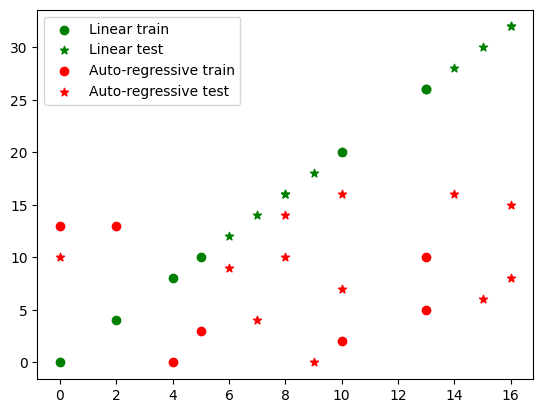

In [125]:
n = 20
data = torch.arange(n)
data = torch.tensor(np.random.choice(data, n)).view(-1,1).float()
x = data[1:]
yLin = x * 2
yAR = [(data[i-1]) for i in range(1, n)]
yAR = torch.tensor(yAR).view(-1,1).float()

x_train = x[:7]
x_test = x[7:]
yLin_train = yLin[:7]
yLin_test = yLin[7:]
yAR_train = yAR[:7]
yAR_test = yAR[7:]

plt.scatter(x_train, yLin_train, color='green', label='Linear train')
plt.scatter(x_test, yLin_test, color='green', label='Linear test', marker='*')
plt.scatter(x_train, yAR_train, color='red', label='Auto-regressive train')
plt.scatter(x_test, yAR_test, color='red', label='Auto-regressive test', marker='*')
plt.legend()

In [128]:
x, yAR

(tensor([[ 5.],
         [13.],
         [ 2.],
         [10.],
         [13.],
         [ 0.],
         [ 4.],
         [ 7.],
         [10.],
         [ 0.],
         [ 9.],
         [ 6.],
         [15.],
         [16.],
         [14.],
         [ 8.],
         [16.],
         [10.],
         [ 8.]]),
 tensor([[ 3.],
         [ 5.],
         [13.],
         [ 2.],
         [10.],
         [13.],
         [ 0.],
         [ 4.],
         [ 7.],
         [10.],
         [ 0.],
         [ 9.],
         [ 6.],
         [15.],
         [16.],
         [14.],
         [ 8.],
         [16.],
         [10.]]))

In [129]:
class LinearModel(nn.Module):
  def __init__(self, ):
    super(LinearModel, self).__init__()

    self.fc = nn.Linear(1, 1)

  def forward(self, x):
    out = self.fc(x)
    return out

In [130]:
linmodel = LinearModel()
out = linmodel(x_train)
out

tensor([[-2.0616],
        [-6.6569],
        [-0.3384],
        [-4.9337],
        [-6.6569],
        [ 0.8104],
        [-1.4872]], grad_fn=<AddmmBackward0>)

In [131]:
linmodel.fc.weight

Parameter containing:
tensor([[-0.5744]], requires_grad=True)

In [132]:
optimizer = torch.optim.SGD(linmodel.parameters(), lr=0.01)
loss_fn = nn.MSELoss()
for e in range(10):
  out = linmodel(x_train)
  loss = loss_fn(out, yLin_train)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  print(f'w: {linmodel.fc.weight.detach().item():.2f}, loss: {loss.detach().item():.2f}')

w: 2.87, loss: 429.94
w: 1.52, loss: 66.77
w: 2.05, loss: 10.63
w: 1.84, loss: 1.95
w: 1.92, loss: 0.61
w: 1.89, loss: 0.40
w: 1.91, loss: 0.36
w: 1.90, loss: 0.35
w: 1.90, loss: 0.34
w: 1.90, loss: 0.34


In [134]:
yLin_train, out

(tensor([[10.],
         [26.],
         [ 4.],
         [20.],
         [26.],
         [ 0.],
         [ 8.]]),
 tensor([[10.5082],
         [25.7389],
         [ 4.7966],
         [20.0274],
         [25.7389],
         [ 0.9889],
         [ 8.6043]], grad_fn=<AddmmBackward0>))

Train on AR data

In [135]:
linmodel = LinearModel()
out = linmodel(x_train)
out

tensor([[3.3852],
        [8.7801],
        [1.3621],
        [6.7570],
        [8.7801],
        [0.0134],
        [2.7108]], grad_fn=<AddmmBackward0>)

In [136]:
linmodel.fc.weight

Parameter containing:
tensor([[0.6744]], requires_grad=True)

In [138]:
optimizer = torch.optim.SGD(linmodel.parameters(), lr=0.01)
loss_fn = nn.MSELoss()
for e in range(10000):
  out = linmodel(x_train)
  loss = loss_fn(out, yAR_train)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  if e%1000==0: print(f'w: {linmodel.fc.weight.detach().item():.2f}, loss: {loss.detach().item():.2f}')

w: 0.11, loss: 29.03
w: -0.32, loss: 22.43
w: -0.32, loss: 22.43
w: -0.32, loss: 22.43
w: -0.32, loss: 22.43
w: -0.32, loss: 22.43
w: -0.32, loss: 22.43
w: -0.32, loss: 22.43
w: -0.32, loss: 22.43
w: -0.32, loss: 22.43


test set performance

In [139]:
with torch.no_grad():
  out = linmodel(x_test)
out, yAR_test

(tensor([[6.4812],
         [5.5341],
         [8.6911],
         [5.8498],
         [6.7969],
         [3.9557],
         [3.6400],
         [4.2714],
         [6.1655],
         [3.6400],
         [5.5341],
         [6.1655]]),
 tensor([[ 4.],
         [ 7.],
         [10.],
         [ 0.],
         [ 9.],
         [ 6.],
         [15.],
         [16.],
         [14.],
         [ 8.],
         [16.],
         [10.]]))

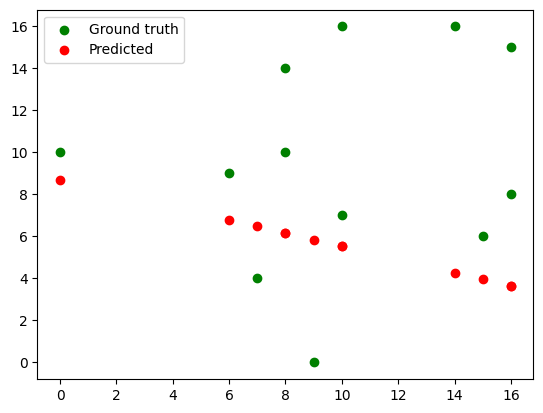

In [140]:
plt.scatter(x_test, yAR_test, color='green', label='Ground truth')
plt.scatter(x_test, out, color='red', label='Predicted')
plt.legend()

In [141]:
class LinearModel(nn.Module):
  def __init__(self, ):
    super(LinearModel, self).__init__()

    self.fc1 = nn.Linear(1, 10)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(10, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    out = self.fc2(x)
    return out

In [193]:
linmodel = LinearModel()
optimizer = torch.optim.SGD(linmodel.parameters(), lr=0.01)
loss_fn = nn.MSELoss()
for e in range(10000):
  out = linmodel(x_train)
  loss = loss_fn(out, yAR_train)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  if e%1000==0: print(f'loss: {loss.detach().item():.2f}')

loss: 58.04
loss: 3.58
loss: 3.46
loss: 3.46
loss: 3.46
loss: 3.46
loss: 3.46
loss: 3.46
loss: 3.46
loss: 3.46


In [194]:
with torch.no_grad():
  out = linmodel(x_train)
out, yAR_train

(tensor([[ 1.2973],
         [ 6.7027],
         [13.0000],
         [ 4.6757],
         [ 6.7027],
         [13.0000],
         [ 0.6216]]),
 tensor([[ 3.],
         [ 5.],
         [13.],
         [ 2.],
         [10.],
         [13.],
         [ 0.]]))

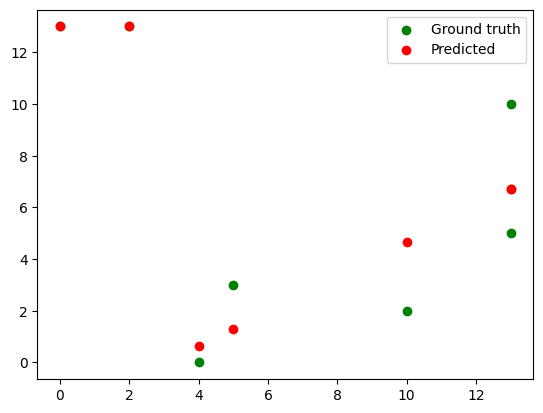

In [195]:
plt.scatter(x_train, yAR_train, color='green', label='Ground truth')
plt.scatter(x_train, out, color='red', label='Predicted')
plt.legend()

In [229]:
with torch.no_grad():
  out_testlin = linmodel(x_test)
out_testlin, yAR_test

(tensor([[ 2.6487],
         [ 4.6757],
         [13.0000],
         [ 4.0000],
         [ 1.9730],
         [ 8.0540],
         [ 8.7297],
         [ 7.3784],
         [ 3.3243],
         [ 8.7297],
         [ 4.6757],
         [ 3.3243]]),
 tensor([[ 4.],
         [ 7.],
         [10.],
         [ 0.],
         [ 9.],
         [ 6.],
         [15.],
         [16.],
         [14.],
         [ 8.],
         [16.],
         [10.]]))

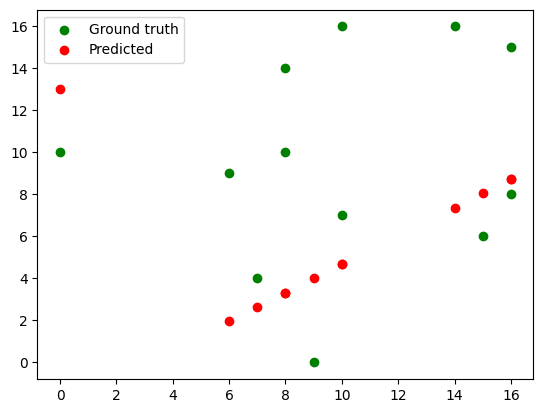

In [197]:
plt.scatter(x_test, yAR_test, color='green', label='Ground truth')
plt.scatter(x_test, out, color='red', label='Predicted')
plt.legend()

In [264]:
class SequenceModel(nn.Module):
  def __init__(self, ):
    super(SequenceModel, self).__init__()
    self.hidden_size = 10
    self.sequence_length = 2
    self.rnn = nn.RNN(1, hidden_size=self.hidden_size, batch_first=True)
    # self.fc = nn.Linear(self.hidden_size * self.sequence_length, 1)
    self.fc = nn.Linear(self.hidden_size, 1)

  def forward(self, x):
    out, _ = self.rnn(x)
    # out.shape: [bs, seq_length, hidden_size]
    out = self.fc(out[:, -2, :])
    # out = self.fc(out.contiguous().view(x.shape[0], self.sequence_length * self.hidden_size))
    return out

In [265]:
seq_length = 2
x_seq = []
y_seq = []
for i in range(x.shape[0]-seq_length):
  x_seq.append(x[i:i+seq_length])
  y_seq.append(yAR[i+seq_length-1])
x_seq = torch.stack(x_seq)
y_seq = torch.stack(y_seq)
x_seq.shape, y_seq.shape

(torch.Size([17, 2, 1]), torch.Size([17, 1]))

In [266]:
x_seq[2], y_seq[2]

(tensor([[ 2.],
         [10.]]),
 tensor([2.]))

In [267]:
x_seq_train = x_seq[:5]
x_seq_test = x_seq[5:]

y_seq_train = y_seq[:5]
y_seq_test = y_seq[5:]

In [275]:
seq_model = SequenceModel()

optimizer = torch.optim.SGD(seq_model.parameters(), lr=0.01)

for e in range(10000):
  out = seq_model(x_seq_train)
  loss = loss_fn(out, y_seq_train)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  if e%1000==0: print(f'loss: {loss.detach().item():.2f}')

loss: 72.52
loss: 0.32
loss: 0.19
loss: 0.08
loss: 0.02
loss: 0.00
loss: 0.00
loss: 0.00
loss: 0.00
loss: 0.00


In [276]:
with torch.no_grad():
  out = seq_model(x_seq_train)
out, y_seq_train

(tensor([[ 4.9995],
         [12.9988],
         [ 1.9998],
         [ 9.9979],
         [12.9988]]),
 tensor([[ 5.],
         [13.],
         [ 2.],
         [10.],
         [13.]]))

In [277]:
seq_model.rnn.weight_ih_l0.shape, seq_model.rnn.weight_hh_l0.shape

(torch.Size([10, 1]), torch.Size([10, 10]))

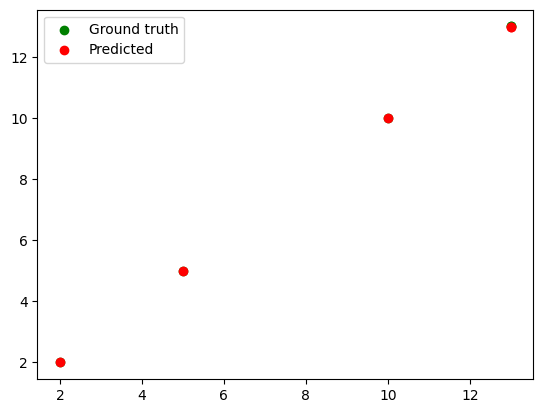

In [278]:
plt.scatter(x_train[:-2], y_seq_train, color='green', label='Ground truth')
plt.scatter(x_train[:-2], out, color='red', label='Predicted')
plt.legend()

In [279]:
with torch.no_grad():
  out_testRNN = seq_model(x_seq_test)
out_testRNN, y_seq_test

(tensor([[-0.3538],
         [ 4.0694],
         [ 6.7783],
         [ 9.9979],
         [-0.3538],
         [ 8.7896],
         [ 5.8890],
         [13.6075],
         [13.7195],
         [13.3962],
         [ 7.7244],
         [13.7195]]),
 tensor([[ 0.],
         [ 4.],
         [ 7.],
         [10.],
         [ 0.],
         [ 9.],
         [ 6.],
         [15.],
         [16.],
         [14.],
         [ 8.],
         [16.]]))

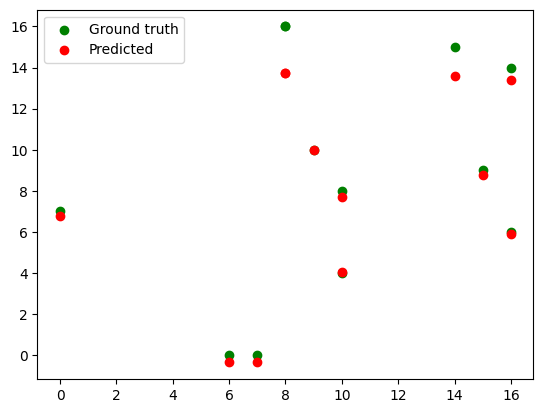

In [280]:
plt.scatter(x_test, y_seq_test, color='green', label='Ground truth')
plt.scatter(x_test, out_testRNN, color='red', label='Predicted')
plt.legend()

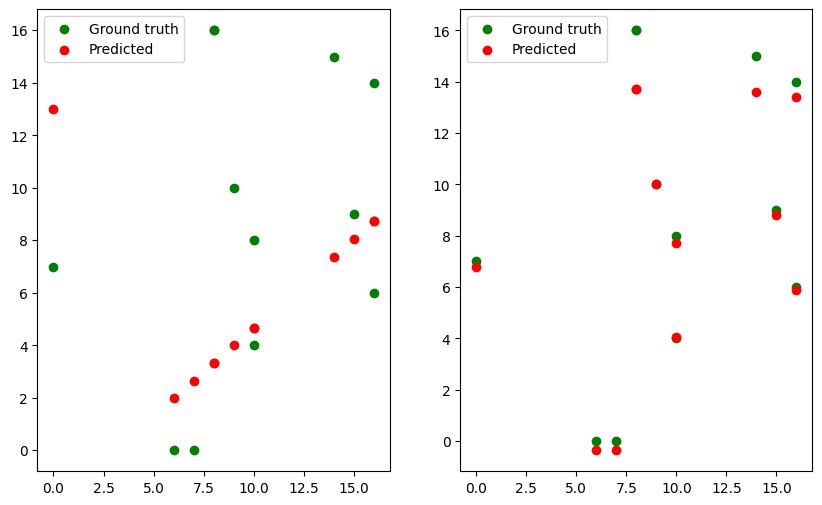

In [281]:
fig, axes = plt.subplots(1,2, figsize=(10, 6))
for ax, output in zip(axes.flat, [out_testlin, out_testRNN]):
  ax.scatter(x_test, y_seq_test, color='green', label='Ground truth')
  ax.scatter(x_test, output, color='red', label='Predicted')
  ax.legend()